In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading and general cleaning

In [2]:
df=pd.read_csv('news.csv', header=0, sep="\^", engine='python')
df.head()

,Unnamed: 0,author,date,num_paragraphs,text,title
0,0,NaN,2018-01-31T00:00:00-04:00,6,All visits of friends and families to inmates ...,Funeral of slain prison officer today: all jai...
1,1,Gail Alexander,2017-11-29T00:00:00-04:00,15,Allyson Bakshs resignation from the Government...,Its a farceRamdeenPresidents | The Trinidad Gu...
2,2,Rosemarie Sant,2018-02-24T00:00:00-04:00,10,Finance Minister Colm Imbert is insisting that...,Imbert: New ferry can handle journey | The Tri...
3,3,SaschaWilson,2017-10-26T00:00:00-04:00,9,United National Congress (UNC) founder Basdeo ...,Panday: Call UNC election when due | The Trini...
4,4,Rosemarie Sant,2017-11-21T00:00:00-04:00,15,A&V Oil and Gas attorneys say they are yet to ...,A&V; waits on Kroll/Gaffney report | The Trini...


In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,author,date,num_paragraphs,text,title
0,NaN,2018-01-31T00:00:00-04:00,6,All visits of friends and families to inmates ...,Funeral of slain prison officer today: all jai...
1,Gail Alexander,2017-11-29T00:00:00-04:00,15,Allyson Bakshs resignation from the Government...,Its a farceRamdeenPresidents | The Trinidad Gu...
2,Rosemarie Sant,2018-02-24T00:00:00-04:00,10,Finance Minister Colm Imbert is insisting that...,Imbert: New ferry can handle journey | The Tri...
3,SaschaWilson,2017-10-26T00:00:00-04:00,9,United National Congress (UNC) founder Basdeo ...,Panday: Call UNC election when due | The Trini...
4,Rosemarie Sant,2017-11-21T00:00:00-04:00,15,A&V Oil and Gas attorneys say they are yet to ...,A&V; waits on Kroll/Gaffney report | The Trini...


In [4]:
df.describe()

,num_paragraphs
count,2381.000000
mean,13.713566
std,12.724928
min,0.000000
25%,9.000000
50%,12.000000
75%,16.000000
max,491.000000


In [5]:
obj = df.dtypes[df.dtypes == "object"].index
df[obj].describe()

,author,date,text,title
count,1778,2381,2378,2381
unique,49,208,2376,2367
top,Rosemarie Sant,2017-11-07T00:00:00-04:00,When Darryl Smith entered office in September ...,Teen rape suspect now accused of incest | The ...
freq,221,26,2,2


In [6]:
missing = df.columns[df.isna().any()]
missing

Index(['author', 'text'], dtype='object')

Some authors are missing as well as some texts.  We can't just fill authors with mean or median as it would seem as if those works really belong to that author.  We can fill missing authors with  "Anonymous" or "John Doe".  For missing texts, we will drop those rows with missing texts as it is just a few texts that are missing.  Also, missing text means we essentially don't have data on that news report.

In [7]:
df["author"].fillna("John Doe", inplace=True)
df.dropna(subset=["text"], inplace=True)
df[obj].describe()

,author,date,text,title
count,2378,2378,2378,2378
unique,50,208,2376,2364
top,John Doe,2017-11-07T00:00:00-04:00,When Darryl Smith entered office in September ...,Teen rape suspect now accused of incest | The ...
freq,600,26,2,2


In [8]:
df["author"].unique()

array(['John Doe', 'Gail Alexander', 'Rosemarie Sant', 'SaschaWilson',
       'Geisha Kowlessar', 'Rhondor Dowlat', 'Nadaleen Singh',
       'Kevon Felmine', 'Derek Achong', 'ShalizaHassanali',
       'Kalifa Clyne', 'Anna-Lisa Paul', 'Radhica Sookraj',
       'Casandra Thompson-Forbes', 'Joel Julien', 'Charles Kong Soo',
       'Camille Clarke', 'Jensen La Vende', 'Casandra ThompsonForbes',
       'Shastri Boodan', 'RADHICA DE SILVA', 'Khamal Georges',
       'Wesley Gibbings', 'Bobie-Lee Dixon', 'Darren Bahaw',
       ' Rosemarie Sant', 'SHALIZA HASSANALI ', 'Suzanne Sheppard',
       'Rapheal John-Lall', 'Sascha Wilson', 'Shaliza Hassanali',
       'GEISHA ALONZO', ' Shastri Boodan ', 'RALPH BANWARIE',
       'STORIES BY KEVON FELMINE', 'Debra Wanser', 'Joanne Briggs',
       'Nasser Khan ', 'Roshan Ramcharitar', 'Curtis Williams',
       'Rhondor Dowlat ', 'stories by Rosemarie Sant', 'ASCHA WILSON',
       'By Peter Richards', 'STORIES BY SASCHA WILSON', 'SASCHA WILSON ',
       '

words like "Stories" and "by" should be removed from the author list

In [9]:
df["author"]=df["author"].str.lower()
df['author'] = df['author'].str.replace(r'-', " ")
df['author'] = df['author'].str.replace(r'stories by', "")
df['author'] = df['author'].str.replace(r'by', "")
df['author'] = df['author'].str.lstrip()
df["author"].unique()

array(['john doe', 'gail alexander', 'rosemarie sant', 'saschawilson',
       'geisha kowlessar', 'rhondor dowlat', 'nadaleen singh',
       'kevon felmine', 'derek achong', 'shalizahassanali',
       'kalifa clyne', 'anna lisa paul', 'radhica sookraj',
       'casandra thompson forbes', 'joel julien', 'charles kong soo',
       'camille clarke', 'jensen la vende', 'casandra thompsonforbes',
       'shastri boodan', 'radhica de silva', 'khamal georges',
       'wesley gibbings', 'bobie lee dixon', 'darren bahaw',
       'shaliza hassanali ', 'suzanne sheppard', 'rapheal john lall',
       'sascha wilson', 'shaliza hassanali', 'geisha alonzo',
       'shastri boodan ', 'ralph banwarie', 'debra wanser',
       'joanne briggs', 'nasser khan ', 'roshan ramcharitar',
       'curtis williams', 'rhondor dowlat ', 'ascha wilson',
       'peter richards', 'sascha wilson ', 'nna lisa paul',
       'gabrielle hosein', 'rachael thomspon king'], dtype=object)

The name "shaliza hassanali" is the same as "shalizahassanali" so let's replace it.  There is a few examples like this so let's fix it

In [10]:
df['author'] = df['author'].str.replace(r'shalizahassanali', 'shaliza hassanali')
df['author'] = df['author'].str.replace(r'saschawilson', 'sascha wilson')
df['author'] = df['author'].str.replace(r'casandra thompsonforbes', 'casandra thompson forbes')
df['author'] = df['author'].str.replace(r'nna lisa paul', 'anna lisa paul')
print(df["author"].unique())
df["author"].describe()

['john doe' 'gail alexander' 'rosemarie sant' 'sascha wilson'
 'geisha kowlessar' 'rhondor dowlat' 'nadaleen singh' 'kevon felmine'
 'derek achong' 'shaliza hassanali' 'kalifa clyne' 'aanna lisa paul'
 'radhica sookraj' 'casandra thompson forbes' 'joel julien'
 'charles kong soo' 'camille clarke' 'jensen la vende' 'shastri boodan'
 'radhica de silva' 'khamal georges' 'wesley gibbings' 'bobie lee dixon'
 'darren bahaw' 'shaliza hassanali ' 'suzanne sheppard'
 'rapheal john lall' 'geisha alonzo' 'shastri boodan ' 'ralph banwarie'
 'debra wanser' 'joanne briggs' 'nasser khan ' 'roshan ramcharitar'
 'curtis williams' 'rhondor dowlat ' 'ascha wilson' 'peter richards'
 'sascha wilson ' 'anna lisa paul' 'gabrielle hosein'
 'rachael thomspon king']


count         2378
unique          42
top       john doe
freq           600
Name: author, dtype: object

In [11]:
df.drop_duplicates(keep=False, inplace=True)
print(df.describe())
df[obj].describe()

       num_paragraphs
count     2374.000000
mean        13.730413
std         12.735195
min          1.000000
25%          9.000000
50%         12.000000
75%         16.000000
max        491.000000


,author,date,text,title
count,2374,2374,2374,2374
unique,42,208,2374,2362
top,john doe,2017-11-07T00:00:00-04:00,He took some time after the surprise announcem...,Tewarie: Chaguaramas land deals above board | ...
freq,598,26,1,2


Duplicate values have been dropped

In [12]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Cleaning Title and Text

In [13]:
df["title"].head(20)

0     Funeral of slain prison officer today: all jai...
1     Its a farceRamdeenPresidents | The Trinidad Gu...
2     Imbert: New ferry can handle journey | The Tri...
3     Panday: Call UNC election when due | The Trini...
4     A&V; waits on Kroll/Gaffney report | The Trini...
5     Fifth member of JLSC appointed | The Trinidad ...
6     Shut your mouth | The Trinidad Guardian Newspaper
7     Muslims claim police provocation at sando rall...
8     Cops: Gangs recruiting teens to hide weapons, ...
9     Cops to review video footage to detect law bre...
10    Cellphone thief nabbed at SFGH | The Trinidad ...
11    Tax increase short-sighted | The Trinidad Guar...
12    Reject xenophobia | The Trinidad Guardian News...
13    Crash victims mom wants Govt to help him | The...
14    Taxi driver killed, dumped in Caroni | The Tri...
15    State to pay half of Devants legal cost in wir...
16    Carmona: Crime rate untenable | The Trinidad G...
17    Homeless seek shelter | The Trinidad Guard

In [14]:
df["text"].head(20)

0     All visits of friends and families to inmates ...
1     Allyson Bakshs resignation from the Government...
2     Finance Minister Colm Imbert is insisting that...
3     United National Congress (UNC) founder Basdeo ...
4     A&V Oil and Gas attorneys say they are yet to ...
5     "Attorney Nicole Beaubrun-Toby was yesterday a...
6     Prime Minister Dr Keith Rowley yesterday react...
7     Members of the T&T Police Service were blamed ...
8     Police are closely monitoring a disturbing tre...
9     Port-of-Spain Division Snr Supt Floris Hodge-G...
10    Patients at the San Fernando General Hospital ...
11    The Bankers Association of T&T (BATT) has desc...
12    Interim Rector of the Cathedral Church of Holy...
13    Grimacing at the surgical cut on his chest and...
14    A taxi driver who went missing after he left h...
15    The State has been ordered to pay half the leg...
16    President Anthony Carmona yesterday expressed ...
17    Two days after the Port-of-Spain City Corp

We can remove brackets and quotations as well as any other punctuations including strokes

In [15]:
tokens_title = df["title"].apply(lambda x:word_tokenize(x))
tokens_text = df["text"].apply(lambda x:word_tokenize(x))

In [16]:
tokens_title = tokens_title.apply(lambda instance: [word.lower() for word in instance if word.isalpha()]  )
tokens_text = tokens_text.apply(lambda instance: [word.lower() for word in instance if word.isalpha()]  )

In [17]:
tokens_title.head()

0    [funeral, of, slain, prison, officer, today, a...
1    [its, a, farceramdeenpresidents, the, trinidad...
2    [imbert, new, ferry, can, handle, journey, the...
3    [panday, call, unc, election, when, due, the, ...
4    [a, v, waits, on, report, the, trinidad, guard...
Name: title, dtype: object

In [18]:
tokens_text.head()

0    [all, visits, of, friends, and, families, to, ...
1    [allyson, bakshs, resignation, from, the, gove...
2    [finance, minister, colm, imbert, is, insistin...
3    [united, national, congress, unc, founder, bas...
4    [a, v, oil, and, gas, attorneys, say, they, ar...
Name: text, dtype: object

Remove common words from the english language.

In [19]:
stop_words = set(stopwords.words('english'))
tokens_title = tokens_title.apply(lambda instance: [word for word in instance if not word in stop_words]  )
tokens_text = tokens_text.apply(lambda instance: [word for word in instance if not word in stop_words]  )

Reduce words to their stems using word lematization

In [20]:
lemmatizer = WordNetLemmatizer()
tokens_title = tokens_title.apply(lambda instance:[lemmatizer.lemmatize(word, pos="v") for word in instance])
tokens_text = tokens_text.apply(lambda instance:[lemmatizer.lemmatize(word, pos="v") for word in instance])

In [21]:
tokens_title.head()

0    [funeral, slay, prison, officer, today, jail, ...
1    [farceramdeenpresidents, trinidad, guardian, n...
2    [imbert, new, ferry, handle, journey, trinidad...
3    [panday, call, unc, election, due, trinidad, g...
4     [v, wait, report, trinidad, guardian, newspaper]
Name: title, dtype: object

In [22]:
tokens_text.head()

0    [visit, friends, families, inmates, prison, fa...
1    [allyson, bakshs, resignation, governments, se...
2    [finance, minister, colm, imbert, insist, gall...
3    [unite, national, congress, unc, founder, basd...
4    [v, oil, gas, attorneys, say, yet, receive, re...
Name: text, dtype: object

In [23]:
df["title_clean"]=tokens_title.apply(lambda instance: " ".join(instance))
df["text_clean"]=tokens_text.apply(lambda instance: " ".join(instance))

In [24]:
df.head()

,author,date,num_paragraphs,text,title,title_clean,text_clean
0,john doe,2018-01-31T00:00:00-04:00,6,All visits of friends and families to inmates ...,Funeral of slain prison officer today: all jai...,funeral slay prison officer today jail suspend...,visit friends families inmates prison faciliti...
1,gail alexander,2017-11-29T00:00:00-04:00,15,Allyson Bakshs resignation from the Government...,Its a farceRamdeenPresidents | The Trinidad Gu...,farceramdeenpresidents trinidad guardian newsp...,allyson bakshs resignation governments senate ...
2,rosemarie sant,2018-02-24T00:00:00-04:00,10,Finance Minister Colm Imbert is insisting that...,Imbert: New ferry can handle journey | The Tri...,imbert new ferry handle journey trinidad guard...,finance minister colm imbert insist galleons p...
3,sascha wilson,2017-10-26T00:00:00-04:00,9,United National Congress (UNC) founder Basdeo ...,Panday: Call UNC election when due | The Trini...,panday call unc election due trinidad guardian...,unite national congress unc founder basdeo pan...
4,rosemarie sant,2017-11-21T00:00:00-04:00,15,A&V Oil and Gas attorneys say they are yet to ...,A&V; waits on Kroll/Gaffney report | The Trini...,v wait report trinidad guardian newspaper,v oil gas attorneys say yet receive report can...


###### Topic Modelling on Title

In [25]:
def display_topics(H, W, feature_names, documents, no_top_words):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [26]:
documents = list(df["title_clean"])[0:5000]
print(len(documents))

2374


In [27]:
cv = CountVectorizer(stop_words = 'english')
tfidf = TfidfVectorizer(stop_words = 'english')

cv_vec=cv.fit_transform(documents)
tf_vec=tfidf.fit_transform(documents)

tf_feature_names=tfidf.get_feature_names()
cv_feature_names=cv.get_feature_names()

In [28]:
num_topics=15
num_top_words = 10

In [29]:
#NMF
nmf_model = NMF(n_components=num_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf_vec)
nmf_W = nmf_model.transform(tf_vec)
nmf_H = nmf_model.components_

In [30]:
#LDA
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=num_topics, learning_method='online', learning_offset=50.,random_state=0).fit(cv_vec)
lda_W = lda_model.transform(cv_vec)
lda_H = lda_model.components_

In [31]:
#SVD
lsi_model = TruncatedSVD(n_components=num_topics, n_iter=7, random_state=42).fit(cv_vec)
lsi_W = lsi_model.transform(cv_vec)
lsi_H = lsi_model.components_

In [32]:
print("NMF Topics TF")
print("**************************************************************** \n")
display_topics(nmf_H, nmf_W, tf_feature_names, documents, num_top_words)

NMF Topics TF
**************************************************************** 

Topic 0:
guardian trinidad newspaper president body need help home family probe
Topic 1:
charge fraud man sex guardian newspaper trinidad bank worker dui
Topic 2:
kill man newspaper trinidad guardian crash driver hurt robbery ambush
Topic 3:
murder court years victim suspect newspaper trinidad guardian free accuse
Topic 4:
cop arrest drug newspaper trinidad guardian robbery ganja probe leader
Topic 5:
hold suspect robbery newspaper trinidad guardian airport bust drug attack
Topic 6:
officer prison dillon health action court immigration protect release laws
Topic 7:
bail accuse sex grant heist piarco baksh newspaper trinidad guardian
Topic 8:
shoot dead man newspaper trinidad guardian death employee miss hurt
Topic 9:
new ferry tobago arrive trinidad guardian newspaper imbert chamber stakeholders
Topic 10:
pm talk meet team court dominica plate step today defend
Topic 11:
police men shootout hotlines custod

Crime: topics[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14]
Business: topics [9]
Politics: topics [10, 12]

In [33]:
print("LDA Topics")
print("**************************************************************** \n")
display_topics(lda_H, lda_W, cv_feature_names, documents, num_top_words)


LDA Topics
**************************************************************** 

Topic 0:
threat address caricom break mandir crack huge rainfall folly carnivalrowley
Topic 1:
churchill obama merkel idols nadias path reform charities mcal ansa
Topic 2:
unite trust assoc deo singh dr ele stun adopt emas
Topic 3:
child society relocation agri strong heroes arouca trend porn blind
Topic 4:
angostura fixin state xenophobia shop cuffie roti ask letter reject
Topic 5:
guardian trinidad newspaper cop kill charge man murder new police
Topic 6:
st title worry king dry dock junior classmates implementation prize
Topic 7:
small rambharat turnout format fan mega farm unveil reserviors season
Topic 8:
member appoint sherons jlsc robocop clue theyre diplomat throw unanimous
Topic 9:
open fireworks doors shutdown medics learn tribute archbishop convict socadrome
Topic 10:
suffer data asylum role value week exploitation involve scandal captivity
Topic 11:
river privy council grande caroni ssa old dump cl

Crime: Topics [5, 10, 12]
Education: Topics [6]
Farming: Topic: Topics [7]
Politics:Topics [0, 1, 2, 8, 11]
Social Issues: Topics [3, 4, 11]
Carnival: Topics [0, 9, 14]

Topic 13 is unclear.  Several of the topics were also not clear in what their main topic was, example topic 0.

In [34]:
print("LSI Topics")
print("**************************************************************** \n")
display_topics(lsi_H, lsi_W, cv_feature_names, documents, num_top_words)

LSI Topics
**************************************************************** 

Topic 0:
guardian trinidad newspaper cop kill man charge murder new police
Topic 1:
cop kill man charge murder shoot bail suspect robbery gun
Topic 2:
man kill shoot murder charge dead police suspect woman driver
Topic 3:
charge murder bail suspect court accuse sex fraud years bank
Topic 4:
shoot man dead charge cop bail gun jail car body
Topic 5:
new officer prison ferry shoot man tobago dead query police
Topic 6:
hold suspect shoot police murder dead officer gun prison robbery
Topic 7:
police charge officer bail kill help prison want driver shoot
Topic 8:
pm police officer man meet talk prison today court unc
Topic 9:
hold charge officer pm suspect kill prison gun bail robbery
Topic 10:
officer prison man jail gun body probe hold dillon court
Topic 11:
shoot officer prison dead court murder kill dillon today driver
Topic 12:
govt hold officer ag owe house prison probe want suspect
Topic 13:
court lawsuit bo

Crime: Topics 0, 1, 2, 3, 4, 5, 6 ,7, 8, 9 10, 11, 12, 13, 14

LDA performed poorly as most of it's topic sentences were hard to comprehend and therefore categorize.  This may be fixed by altering the number of topics but for the examination, 15 topics were specified.  NMF performed the best as it's topics were clear and multiple categories were discernable from the topics generated.  LSI only produced one topic and so is not as informative as NMF.

###### Topic Modelling on Text

In [35]:
documents = list(df["text_clean"])[0:5000]
print(len(documents))

2374


In [36]:
cv_vec=cv.fit_transform(documents)
tf_vec=tfidf.fit_transform(documents)

tf_feature_names=tfidf.get_feature_names()
cv_feature_names=cv.get_feature_names()

In [37]:
num_topics=15
num_top_words = 10

In [38]:
#NMF
nmf_model = NMF(n_components=num_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf_vec)
nmf_W = nmf_model.transform(tf_vec)
nmf_H = nmf_model.components_

In [39]:
#LDA
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=num_topics, learning_method='online', learning_offset=50.,random_state=0).fit(cv_vec)
lda_W = lda_model.transform(cv_vec)
lda_H = lda_model.components_

In [40]:
#SVD
lsi_model = TruncatedSVD(n_components=num_topics, n_iter=7, random_state=42).fit(cv_vec)
lsi_W = lsi_model.transform(cv_vec)
lsi_H = lsi_model.components_

In [41]:
print("NMF Topics TF")
print("**************************************************************** \n")
display_topics(nmf_H, nmf_W, tf_feature_names, documents, num_top_words)

NMF Topics TF
**************************************************************** 

Topic 0:
say people government work make need come time party national
Topic 1:
police shoot officer suspect man kill murder road men say
Topic 2:
archie judge cj sabbatical allegations justice chief president association judicial
Topic 3:
vessel port ferry passengers tobago sail cabo seabridge passenger flight
Topic 4:
flood water residents road wasa river areas regional affect say
Topic 5:
petrotrin oil audit company report internal baksh gas deokiesingh production
Topic 6:
school students education teachers garcia parent ministry secondary children principal
Topic 7:
prison officer prisons richards association security inmates boodram kill dillon
Topic 8:
charge court bail magistrate appear boodram grant allege magistrates accuse
Topic 9:
band pan carnival mas panorama stage masqueraders trinbago large savannah
Topic 10:
commissioner police psc dulalchan land commission deputy process service post
Topic

Crime/Law: Topics [1, 2, 7, 8,10, 12]
Travel: Topic [3]
Natural Disaster: Topic [4]
Oil and Gas: Topic [5]
Education: Topics [6, 13]
Carnival: Topic [9]
Politics: Topics [0,14]
Business: Topic [11]

In [42]:
print("LDA Topics")
print("**************************************************************** \n")
display_topics(lda_H, lda_W, cv_feature_names, documents, num_top_words)


LDA Topics
**************************************************************** 

Topic 0:
appeal grandison sentence witness convict hon commute testify gulf roopchand
Topic 1:
temple ebony lawson deposit announcers listeners dasheen pundit managements fabrice
Topic 2:
song calypso sing baby monarch tuco louis soca volcano oconnor
Topic 3:
school students education garcia parent children teachers secondary ministry student
Topic 4:
skeete swain waterwheel skeetes sareta bearer barbadosher leonarda wellgap misplace
Topic 5:
carnival band mas angostura year medical centre stage city costume
Topic 6:
band natural pan sciences competition additional open soca nlcb mathematics
Topic 7:
et ac eu ipsc ut ligula libero nulla vel metus
Topic 8:
shandong koon koons deshi fulfilment unesco melee disarm baseball discard
Topic 9:
say minister people government make yesterday work time issue come
Topic 10:
taylor overs england gayle indies plunkett ali cummins ball rashid
Topic 11:
alleyne penetration s

Law/Crime: Topics [0, 11, 14]
Business: Topic [1]
Carnival: Topics [2, 5, 6]
Education: Topic [3]
Sports: Topics [8, 10]
Politics: Topics [9, 13]

Topics 4, 7 and 12 are unclear

In [43]:
print("LSI Topics")
print("**************************************************************** \n")
display_topics(lsi_H, lsi_W, cv_feature_names, documents, num_top_words)

LSI Topics
**************************************************************** 

Topic 0:
say police minister people yesterday government make officer time work
Topic 1:
natural sciences additional open mathematics environmental business ict mohammed languages
Topic 2:
police officer shoot prison charge kill murder man suspect report
Topic 3:
minister prime report president court public rowley police state government
Topic 4:
court judge president justice archie say sabbatical leave chief cj
Topic 5:
vessel port water ferry company report tobago passengers service yesterday
Topic 6:
officer say vessel prison port service ferry passengers tobago president
Topic 7:
minister prime water house president rowley road home tobago flood
Topic 8:
officer prison people band tobago school national time president trinidad
Topic 9:
officer water prison minister ministry flood road work house home
Topic 10:
school report children students minister education ministry parent oil garcia
Topic 11:
party oi

Politics: Topics [0, 3, 7, 9]
Crime/Law: Topics [2, 4, 8] 
Education: Topics [1, 10, 12]
Travel: Topics [5,6]
Oil and Gas: Topics [11, 13]
Carnival: Topic [14]

LDA performed poorly as most of it's topic sentences were hard to comprehend and therefore categorize.  This may be fixed by altering the number of topics but for the examination, 15 topics were specified.  NMF performed better than LSI because LSI topics tend to be mixed with words such as "students" and "education" being mixed with "oil".

When comparing text to titles, in all cases, there were less topics in the titles than in the text.  This is expected as titles seek to give just the gist of the article it names while the text may have multiple topics.

However, LSI only produced one title topic while there were many topics in its text.  It therefore may not be accurate.  Although LDA produced some confusing strings, it's topics mostly match between title and text.  NMF produced few topics for title and many more from the text.  However, the title topics for NMF seem to be broad topics that the text topics branch from.

#### Annonymous Topics

Anonymous articles were previously marked as having author "john doe".  We will use only the titles and NMF in determining the topics of the anonymous articles.  This is because title and NMF seem to give general, broad topics that are generally accurate to the text being described without giving confusing strings.

In [44]:
anon= df.where(df["author"]=="john doe")
anon = anon.dropna()
anon.describe()

,num_paragraphs
count,598.000000
mean,11.242475
std,21.492854
min,1.000000
25%,6.000000
50%,9.000000
75%,13.000000
max,491.000000


In [45]:
documents = list(anon["title_clean"])[0:5000]

In [46]:
tf_vec=tfidf.fit_transform(documents)
tf_feature_names=tfidf.get_feature_names()

In [47]:
#NMF
nmf_model = NMF(n_components=num_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf_vec)
nmf_W = nmf_model.transform(tf_vec)
nmf_H = nmf_model.components_

print("NMF Topics TF")
print("**************************************************************** \n")
display_topics(nmf_H, nmf_W, tf_feature_names, documents, num_top_words)

NMF Topics TF
**************************************************************** 

Topic 0:
guardian trinidad newspaper need fete govt workers people miss new
Topic 1:
murder court charge suspect manzanilla toddlers newspaper trinidad guardian soldier
Topic 2:
kill driver crash newspaper trinidad guardian truck robbery car hours
Topic 3:
hold suspect robbery newspaper trinidad guardian bust women drivers valencia
Topic 4:
gun seize raid ammo illegal men jail central vest round
Topic 5:
shoot dead hurt time suspect woman dealer wound case charlieville
Topic 6:
man ambush valencia dump mic charge women kill gas atm
Topic 7:
cop streets robbery duty reserve dui deosaran courageous mosque hamper
Topic 8:
pm legacy defend disaster belize praise talk agree people audit
Topic 9:
body decompose forest dump trunk matura lomas las bullet riddle
Topic 10:
police hotlines motorcyclistinjured shootout gas escapee custody nab holdup force
Topic 11:
charge bail sex guardian newspaper trinidad mechanic 

The majority of topics by anonymous authors seem to be about crime.  Topic 0, topic 8 and topic 12 seem to be speaking on politics.  In these cases, the author may have chosen to remain anonymous to avoid some sort of retaliation, political or criminal.

##### Plotting frequency of articles by author

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

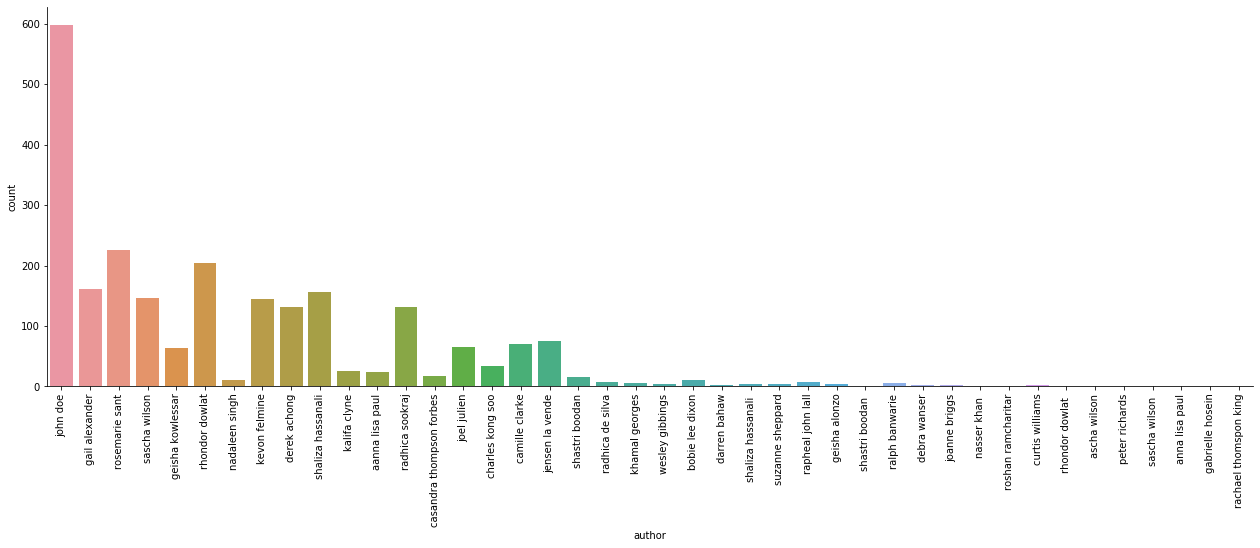

In [48]:
sns.catplot(x="author",  kind="count", data=df,height=6,aspect=3)
plt.xticks(rotation=90)

When checking frequency of author articles, most articles come from anonymous sources follwed by Rosemarie Sant, Rhondor Dowalt, Gail Alexander and then Shaliza Hassanali.

###### Plotting distribution of topics by author

We will use NMF on the text to assign topics to rows.  For visualization sake and because topics tend to repeat, we will reduce the number of topics to 10

In [49]:
documents = list(df["text_clean"])[0:5000]
tf_vec=tfidf.fit_transform(documents)
tf_feature_names=tfidf.get_feature_names()
nmf_model = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf_vec)
nmf_W = nmf_model.transform(tf_vec)
nmf_H = nmf_model.components_

In [50]:
print("Topics used for distribution")
print("**************************************************************** \n")
display_topics(nmf_H, nmf_W, tf_feature_names, documents, num_top_words)

Topics used for distribution
**************************************************************** 

Topic 0:
say minister government people rowley prime work make meet public
Topic 1:
police shoot officer charge man suspect say murder men kill
Topic 2:
judge archie cj justice sabbatical allegations chief court president association
Topic 3:
vessel port ferry passengers tobago sail cabo seabridge passenger flight
Topic 4:
flood water residents road wasa river say areas regional affect
Topic 5:
petrotrin oil audit company report internal baksh deokiesingh gas production
Topic 6:
school students education teachers garcia parent children ministry secondary say
Topic 7:
prison officer prisons richards boodram association security inmates commissioner kill
Topic 8:
party election political unc leader elections cop constitution vote congress
Topic 9:
band carnival pan mas panorama stage masqueraders trinbago large savannah


We will try to summarize what these topics above are about
0. Politics
1. Crime
2. Judicial
3. Travel
4. Natural Disaster
5. Oil and Gas
6. Education
7. Prison
8. Elections
9. Carnival

We managed to summmarize into general, different topics


In [51]:
df["topic"] = nmf_W.argmax(axis=1)
df.head()
df.describe()

,num_paragraphs,topic
count,2374.000000,2374.000000
mean,13.730413,1.870682
std,12.735195,2.572448
min,1.000000,0.000000
25%,9.000000,0.000000
50%,12.000000,1.000000
75%,16.000000,3.000000
max,491.000000,9.000000


In [52]:
df["topic"].replace([0,1,2,3,4,5,6,7,8,9], ["Politics", "Crime", "Judicial", "Travel", "Natural Disaster", "Oil and Gas", "Education", "Prison", "Elections", "Carnival"], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

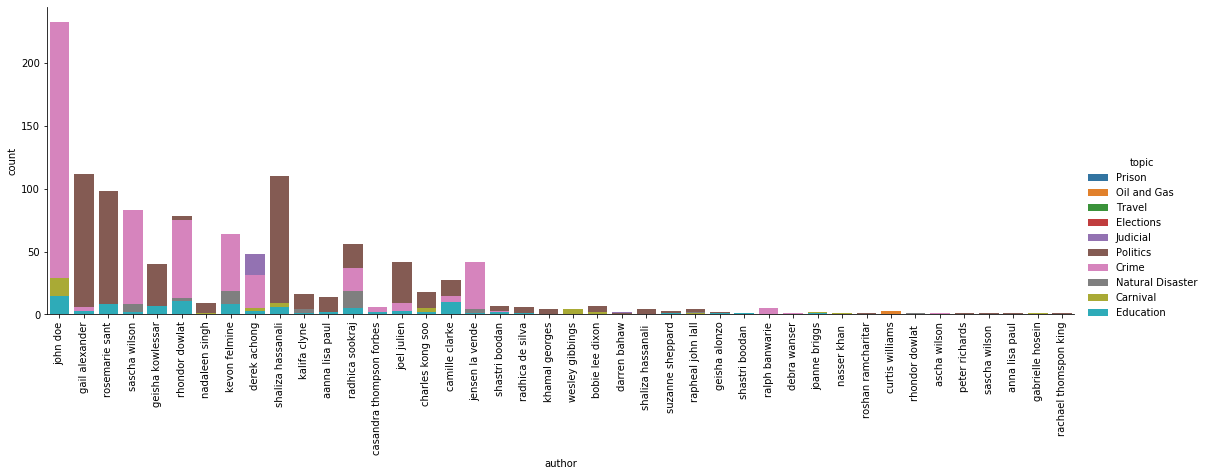

In [53]:
sns.catplot(x="author",  kind="count", data=df,height=5,aspect=3, hue="topic", dodge=False)
plt.xticks(rotation=90)

We can now see what topics are mostly talked about.  Anonymous sources talk mainly on crime.  Gail Alexender, Rosemarie Sant and ShalizaHassanali (the top 3 authors of topics after anonymous authors) mostly talk on politics.  From looking at the graph, it seems that crime is the most popular topic followed by politics.